In [26]:
import sys
sys.path.append('../src')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats
import shap

from sklearn.model_selection import train_test_split

# from eda import get_unique_val_count, check_missing_values, imbalance_check, get_max_class, get_outliers, get_unique_cat_val
# from eda import plot_count, plot_cat_count, plot_num_dist, plot_cat_pie, plot_cat_count_by_var
from feature import feature_selection_by_corr, feature_selection_by_infogain

dark2 = sns.color_palette('Dark2')
plt.style.use("dark_background")
plt.rcParams['axes.spines.top']=False
plt.rcParams['axes.spines.right']=False

In [27]:
df_bby = pd.read_csv('../data/WildBlueberryPollinationSimulationData.csv')
df_bby.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [28]:
df_bby.shape

(777, 18)

In [29]:
df_bby.isna().sum()

Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [30]:
df_bby.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [31]:
df_bby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

In [32]:
df_bby.nunique()

Row#                    777
clonesize                 6
honeybee                  7
bumbles                  10
andrena                  12
osmia                    12
MaxOfUpperTRange          5
MinOfUpperTRange          5
AverageOfUpperTRange      5
MaxOfLowerTRange          5
MinOfLowerTRange          5
AverageOfLowerTRange      5
RainingDays               5
AverageRainingDays        5
fruitset                777
fruitmass               777
seeds                   777
yield                   777
dtype: int64

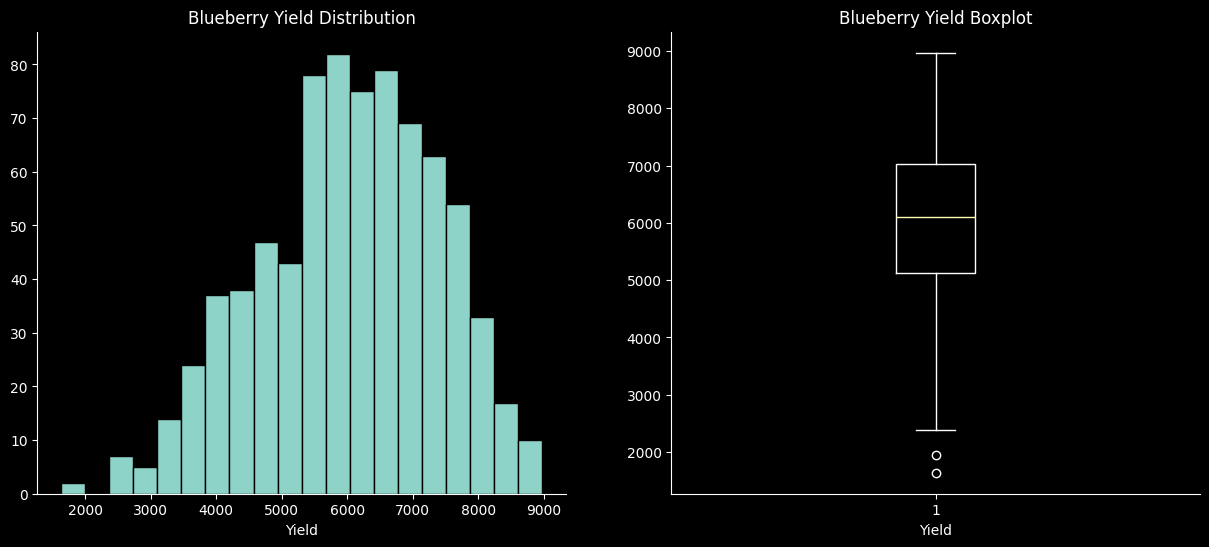

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

ax1.hist(df_bby['yield'], bins=20, edgecolor='black')
ax1.set_xlabel('Yield')
ax1.set_title('Blueberry Yield Distribution')

ax2.boxplot(df_bby['yield'])
ax2.set_xlabel('Yield')
ax2.set_title('Blueberry Yield Boxplot')

plt.show()

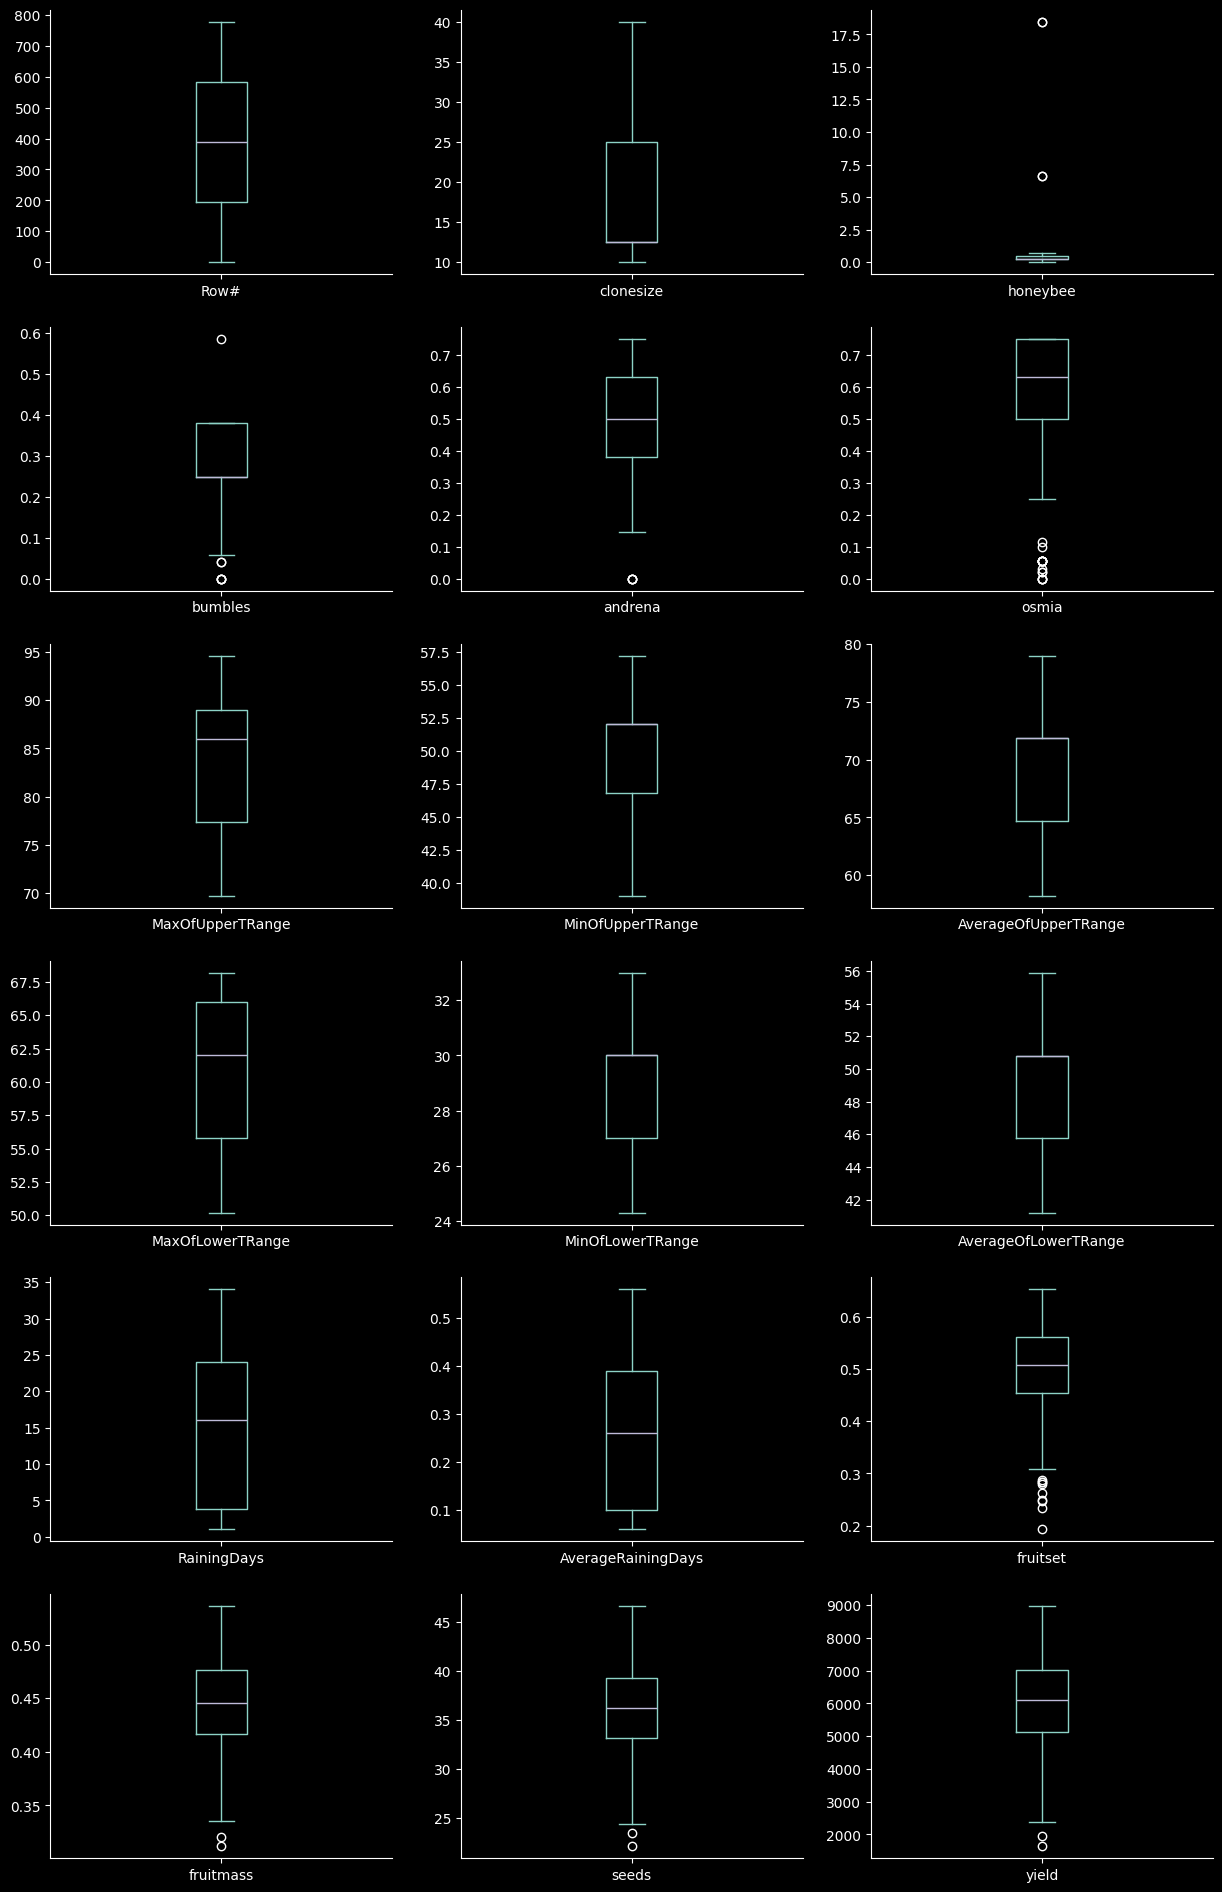

In [34]:
df_bby.plot(kind="box",
            vert=True,
            subplots=True, 
            layout = (6,3), 
            figsize=(15,24), 
            sharex=False, 
            sharey=False);

<Axes: >

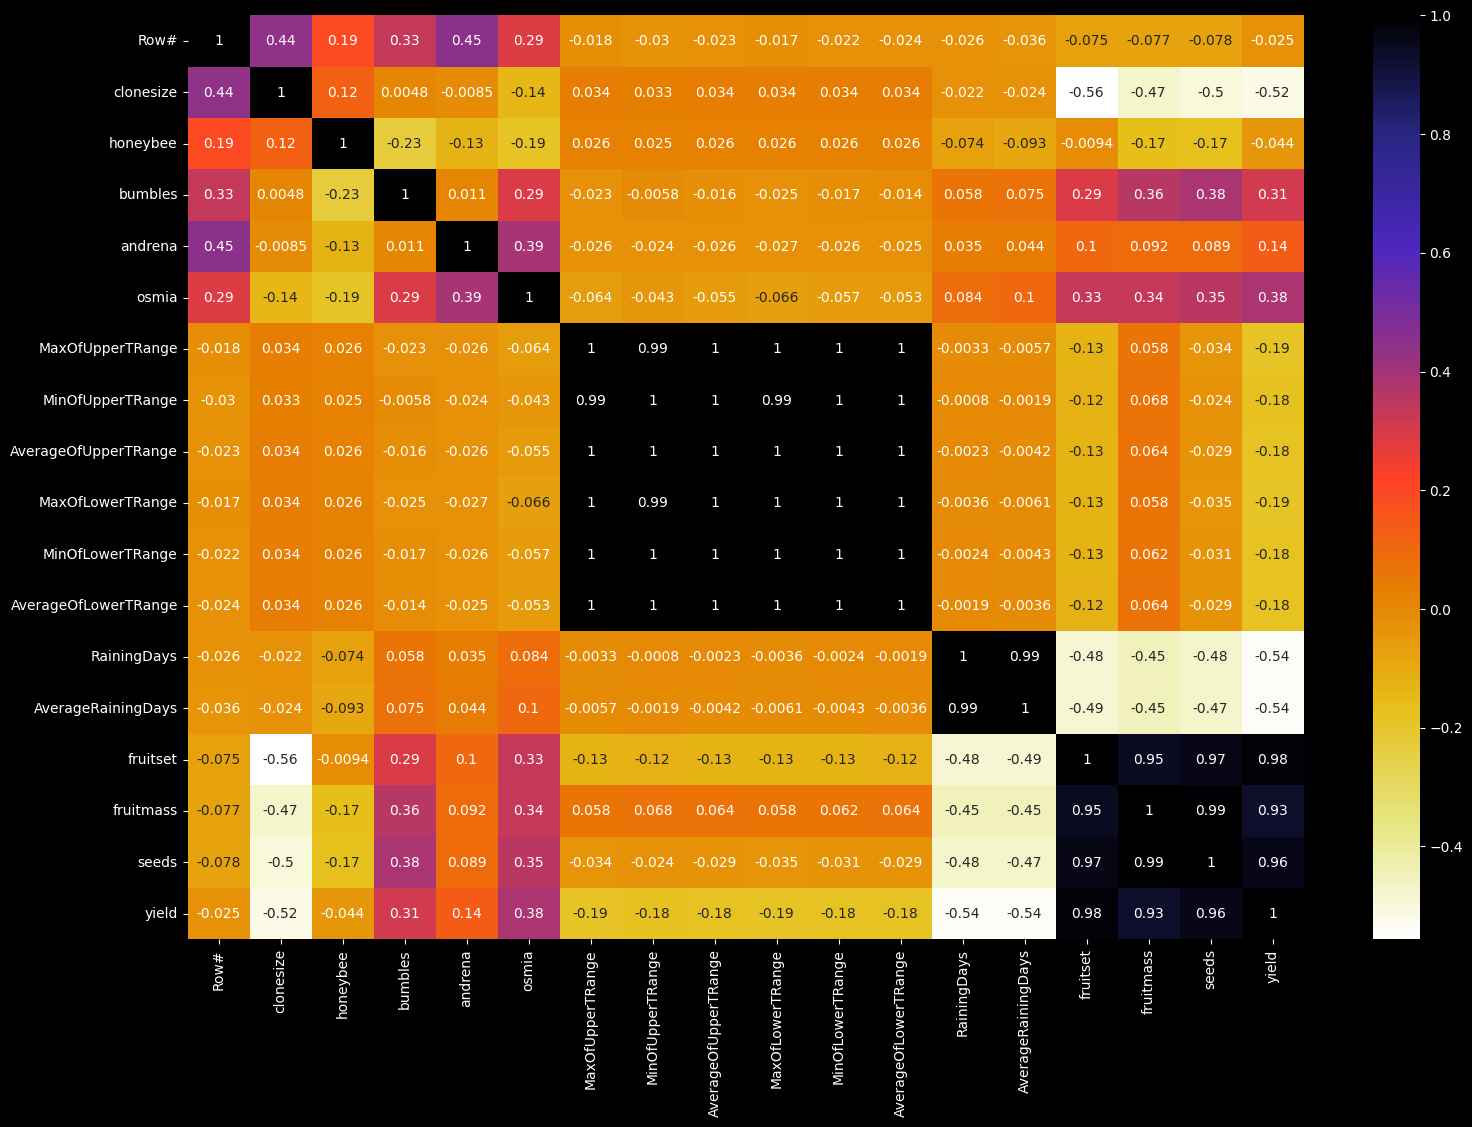

In [35]:
plt.figure(figsize=(18,12))
sns.heatmap(df_bby.corr(), annot=True, cmap=plt.cm.CMRmap_r)

There is a high correlation between the features - fruitset, fruitmass, seeds and yield. Since fruitset, fruitmass, seeds are derivatives of yield, they can be dropped.
There is also a high correlation between MaxOfUpperTRange, MinOfUpperTRange, AverageOfUpperTRange. Similarly, MaxOfLowerTRange, MinOfLowerTRange, AverageOfLowerTRange are highly correlated as well. Therefore, we will keep just one of these columns - AverageOfUpperTRange & AverageOfLowerTRange and drop rest of them
RainingDays, AverageRainingDays are highly correlated. Therfore we will drop RainingDays from the dataset.

In [36]:
df_bby.columns

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [37]:
df_yield = df_bby.drop(columns=['Row#', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'RainingDays', 'honeybee', "fruitset", "fruitmass", "seeds"])
df_yield.head()


,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,yield
0,37.5,0.25,0.25,0.25,71.9,50.8,0.26,3813.165795
1,37.5,0.25,0.25,0.25,71.9,50.8,0.10,4947.605663
2,37.5,0.25,0.25,0.25,79.0,55.9,0.26,3866.798965
3,37.5,0.25,0.25,0.25,79.0,55.9,0.10,4303.943030
4,37.5,0.25,0.25,0.25,71.9,50.8,0.39,3436.493543


In [38]:
df_features = df_yield.drop(columns=['yield'])
df_features.head()

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays
0,37.5,0.25,0.25,0.25,71.9,50.8,0.26
1,37.5,0.25,0.25,0.25,71.9,50.8,0.10
2,37.5,0.25,0.25,0.25,79.0,55.9,0.26
3,37.5,0.25,0.25,0.25,79.0,55.9,0.10
4,37.5,0.25,0.25,0.25,71.9,50.8,0.39


#### IQR

In [39]:
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

clonesize               12.50
bumbles                  0.13
andrena                  0.25
osmia                    0.25
AverageOfUpperTRange     7.20
AverageOfLowerTRange     5.00
AverageRainingDays       0.29
dtype: float64


In [40]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound = lower_bound.reindex(df_yield.columns)
upper_bound = upper_bound.reindex(df_yield.columns)

outliers = (df_yield < lower_bound) | (df_yield > upper_bound)

# Filter out the outliers
df_yield_iqr = df_yield[~outliers.any(axis=1)]
print(df_yield_iqr.shape)

(759, 8)


c:\Users\sfg\Anaconda3\envs\mpg_bbyield\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


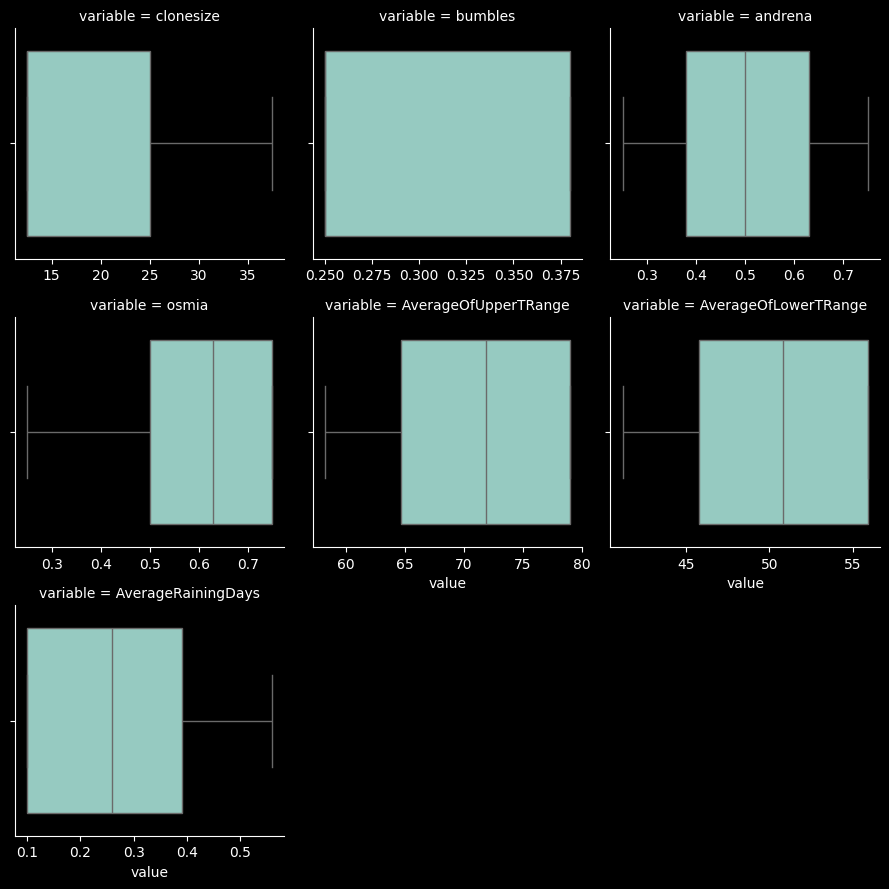

In [41]:
unpivot_iqr = pd.melt(df_yield_iqr, df_yield_iqr.describe().columns[-1], df_yield_iqr.describe().columns[:-1])

g = sns.FacetGrid(unpivot_iqr, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")
plt.show()

#### Z-score

In [42]:
zscore = np.abs(stats.zscore(df_yield))
print(zscore)

     clonesize   bumbles   andrena     osmia  AverageOfUpperTRange  \
0     2.678126  0.488512  1.359549  1.846405              0.414096   
1     2.678126  0.488512  1.359549  1.846405              0.414096   
2     2.678126  0.488512  1.359549  1.846405              1.339534   
3     2.678126  0.488512  1.359549  1.846405              1.339534   
4     2.678126  0.488512  1.359549  1.846405              0.414096   
..         ...       ...       ...       ...                   ...   
772   1.253503  2.494523  0.371655  2.982429              0.414096   
773   3.035546  2.494523  0.371655  2.982429              0.414096   
774   0.176180  2.494523  0.371655  2.982429              0.414096   
775   0.176180  2.494523  0.371655  2.982429              0.407067   
776   0.176180  2.494523  0.371655  2.982429              0.407067   

     AverageOfLowerTRange  AverageRainingDays     yield  
0                0.403960            0.350531  1.622087  
1                0.403960            1.2852

In [43]:
df_yield_zscore = df_yield[(zscore < 3).all(axis=1)]
df_yield_zscore.shape

(767, 8)

c:\Users\sfg\Anaconda3\envs\mpg_bbyield\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


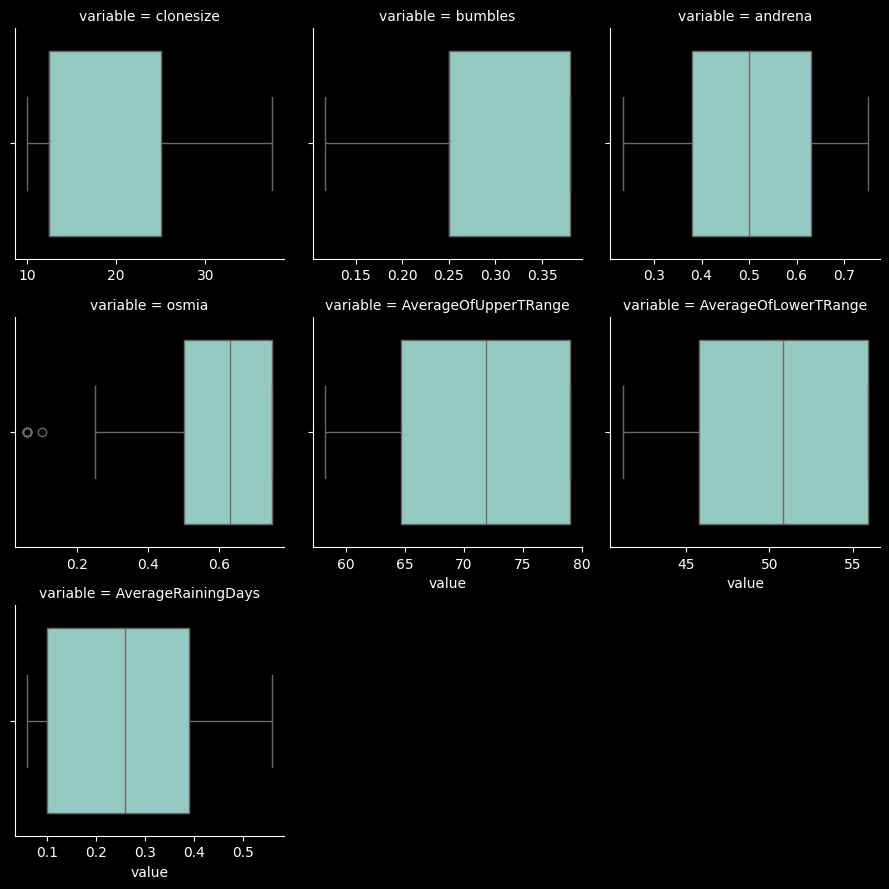

In [44]:
unpivot_zscore = pd.melt(df_yield_zscore, df_yield_zscore.columns[-1], df_yield_zscore.columns[:-1])

g = sns.FacetGrid(unpivot_zscore, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")
plt.show()

#### Traning the model on data where outlier were removed based on Z-score

In [45]:
df_yield_main = df_yield_zscore

In [46]:
# Split the data
X = df_yield_main.drop(['yield'], axis=1)
y = df_yield_main['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

#### Feature Selection

In [47]:
X_train_fs_corr, X_test_fs_corr, fs_corr  = feature_selection_by_corr(X_train, y_train, X_test)
X_train_fs_info, X_test_fs_info, fs_info = feature_selection_by_infogain(X_train, y_train, X_test)

In [48]:
def fs_score_plot(fs_func):
    for i in range(len(fs_func.get_feature_names_out())):
        print('Feature %s: %f' % (fs_func.get_feature_names_out()[i], fs_func.scores_[i]))
    # plot the scores
    plt.bar(fs_func.get_feature_names_out(), fs_func.scores_, color=random.choice(dark2))
    plt.xticks(rotation=90)
    plt.show()

Feature clonesize: 197.463675
Feature bumbles: 28.488060
Feature andrena: 7.497100
Feature osmia: 86.995221
Feature AverageOfUpperTRange: 16.802420
Feature AverageOfLowerTRange: 16.641514
Feature AverageRainingDays: 273.072671


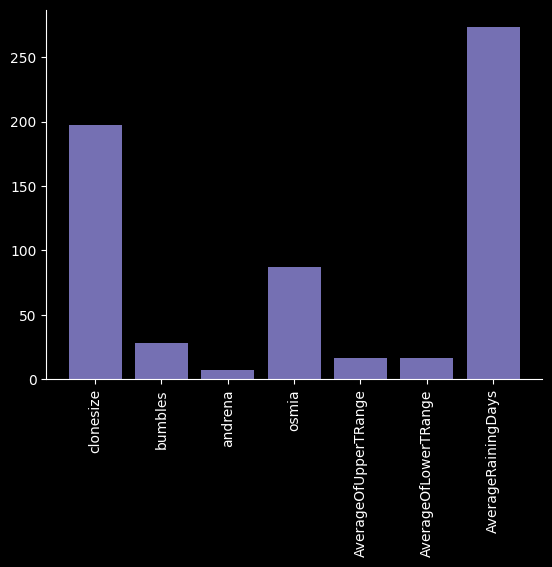

In [49]:
fs_score_plot(fs_corr)

Feature clonesize: 0.164414
Feature bumbles: 0.022046
Feature andrena: 0.051398
Feature osmia: 0.104581
Feature AverageOfUpperTRange: 0.074052
Feature AverageOfLowerTRange: 0.073958
Feature AverageRainingDays: 0.219383


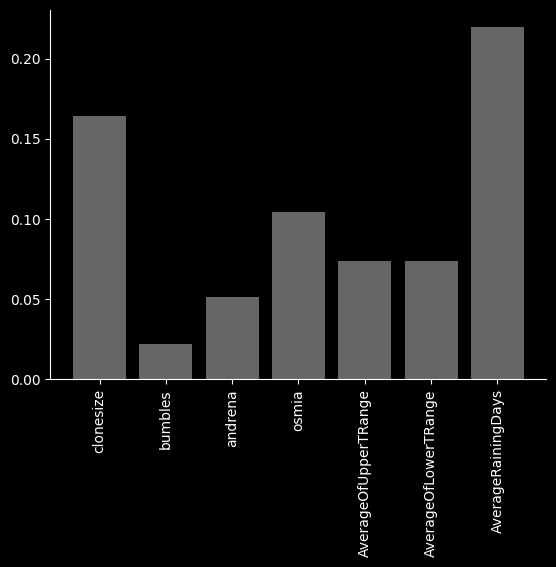

In [50]:
fs_score_plot(fs_info)